# Inspect the automatically generated training data

Inspect and visualize data loading and pre-processing code.

In [1]:
import os
import sys
import numpy as np
import imgaug
import imgaug.augmenters as iaa
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Root directory of the project
ROOT_DIR = os.path.abspath("../training_data_generation/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
import utils
import visualize
import model as modellib
from model import log
from train_model import ChemSegmentConfig, ChemPageDataset


%matplotlib inline 

## Configurations


In [2]:
# Defined in train_model.py
config = ChemSegmentConfig()
config.USE_MINI_MASK = False

## Dataset

In [3]:
# Load dataset

dataset = ChemPageDataset(test_mode=True)

# Must call before using the dataset
dataset.prepare()

In [4]:
print(dataset.image_info)
print(dataset.source_class_ids)
dataset.source_class_ids[dataset.image_info[0]["source"]]

[{'source': '', 'id': 0, 'name': '0'}, {'source': '', 'id': 1, 'name': '1'}, {'source': '', 'id': 2, 'name': '2'}, {'source': '', 'id': 3, 'name': '3'}, {'source': '', 'id': 4, 'name': '4'}, {'source': '', 'id': 5, 'name': '5'}, {'source': '', 'id': 6, 'name': '6'}, {'source': '', 'id': 7, 'name': '7'}, {'source': '', 'id': 8, 'name': '8'}, {'source': '', 'id': 9, 'name': '9'}, {'source': '', 'id': 10, 'name': '10'}, {'source': '', 'id': 11, 'name': '11'}, {'source': '', 'id': 12, 'name': '12'}, {'source': '', 'id': 13, 'name': '13'}, {'source': '', 'id': 14, 'name': '14'}, {'source': '', 'id': 15, 'name': '15'}, {'source': '', 'id': 16, 'name': '16'}, {'source': '', 'id': 17, 'name': '17'}, {'source': '', 'id': 18, 'name': '18'}, {'source': '', 'id': 19, 'name': '19'}, {'source': '', 'id': 20, 'name': '20'}, {'source': '', 'id': 21, 'name': '21'}, {'source': '', 'id': 22, 'name': '22'}, {'source': '', 'id': 23, 'name': '23'}, {'source': '', 'id': 24, 'name': '24'}, {'source': '', 'id'

[0]

In [5]:
# print(dataset.image_ids)

augmentation = iaa.Sometimes(
        0.9,
        iaa.SomeOf((1, 4), [
            iaa.Affine(scale={"x": (0.5, 1.5), "y": (0.5, 1.5)}),
            iaa.Flipud(1),
            iaa.Fliplr(1),
            iaa.OneOf([iaa.GaussianBlur(sigma=(0.0, 2.0)),
                       iaa.imgcorruptlike.JpegCompression(severity=(1, 2)),
                       iaa.imgcorruptlike.Pixelate(severity=(1, 2))]),
            iaa.GammaContrast((2.0, 5.0)),
            iaa.ChangeColorTemperature((1100, 10000))
        ]))

train_generator = modellib.DataGenerator(dataset, config, shuffle=False, augmentation=augmentation)

#train_generator[0][1]

## Display Samples

Load and display images and masks.

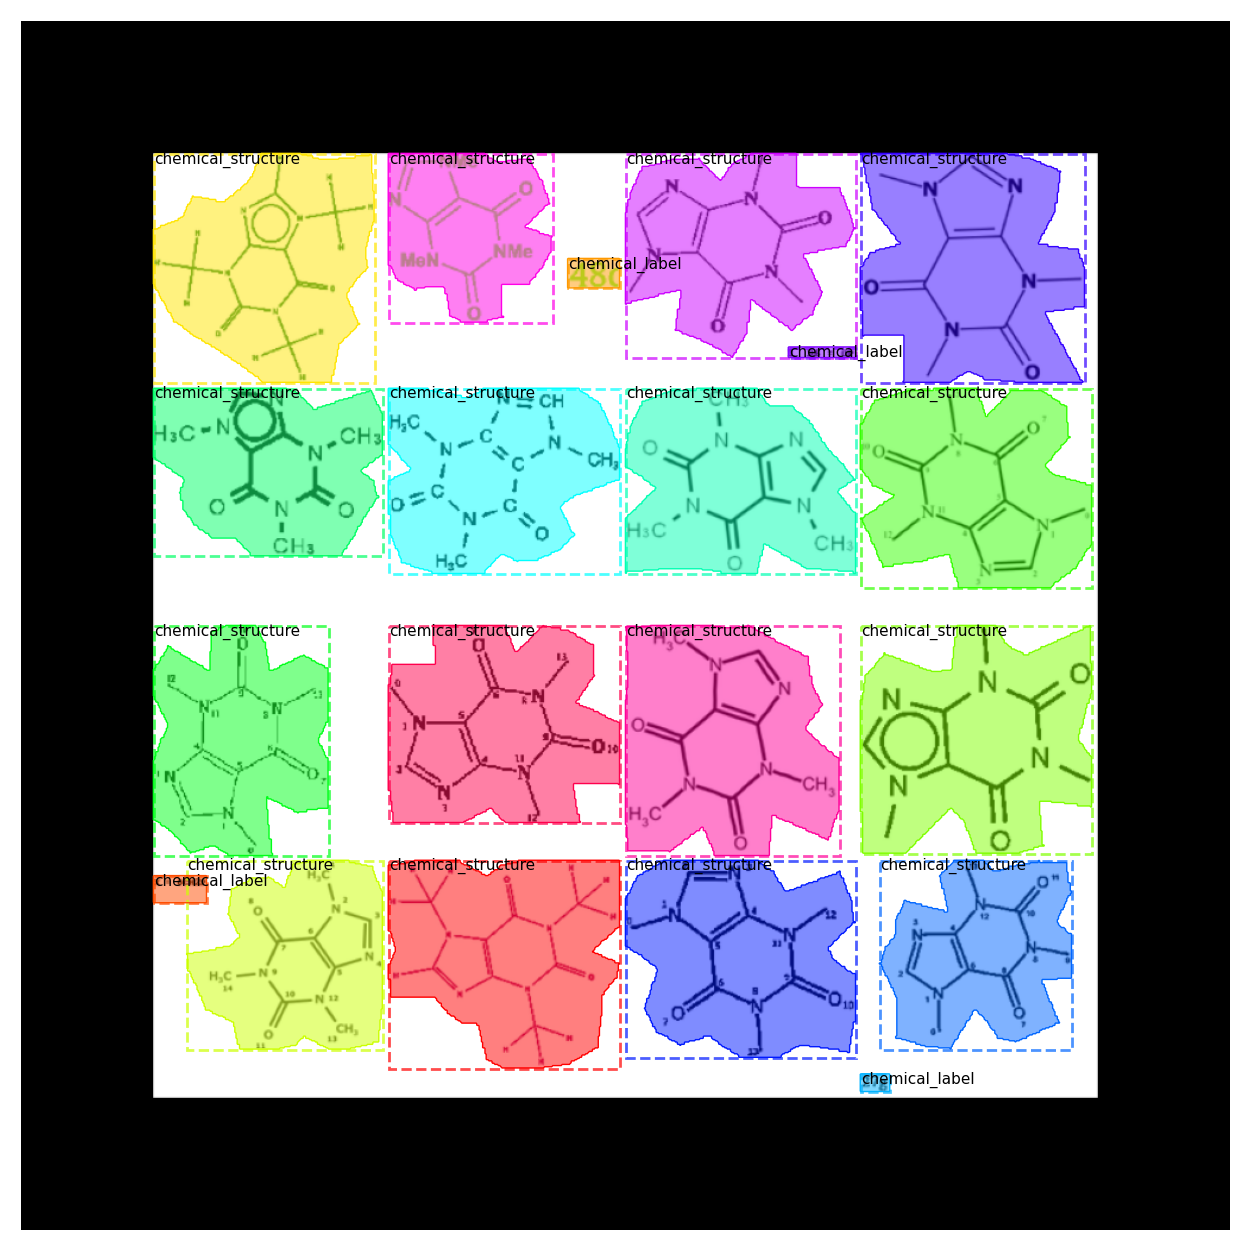

In [7]:
# Load and display random samples

image, _, class_ids, bbox, mask = modellib.load_image_gt(dataset, config, 1)
config.USE_MINI_MASK = False
#visualize.display_instances(image, bbox, mask, class_ids, dataset.categories)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

3145728


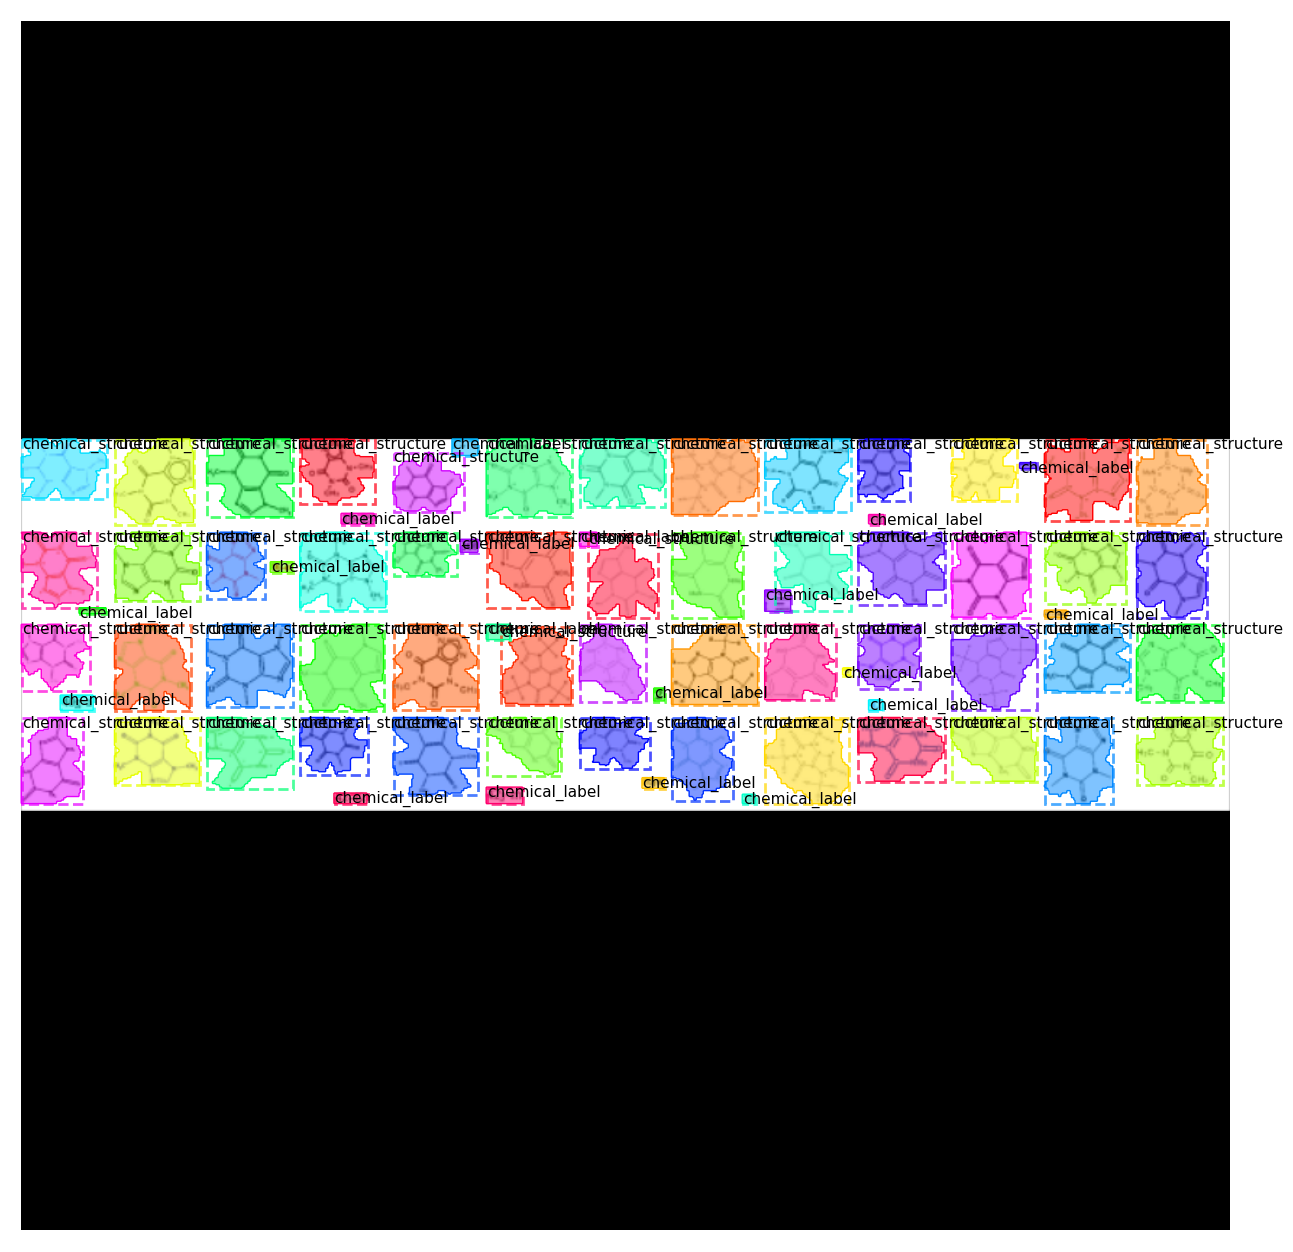

3145728


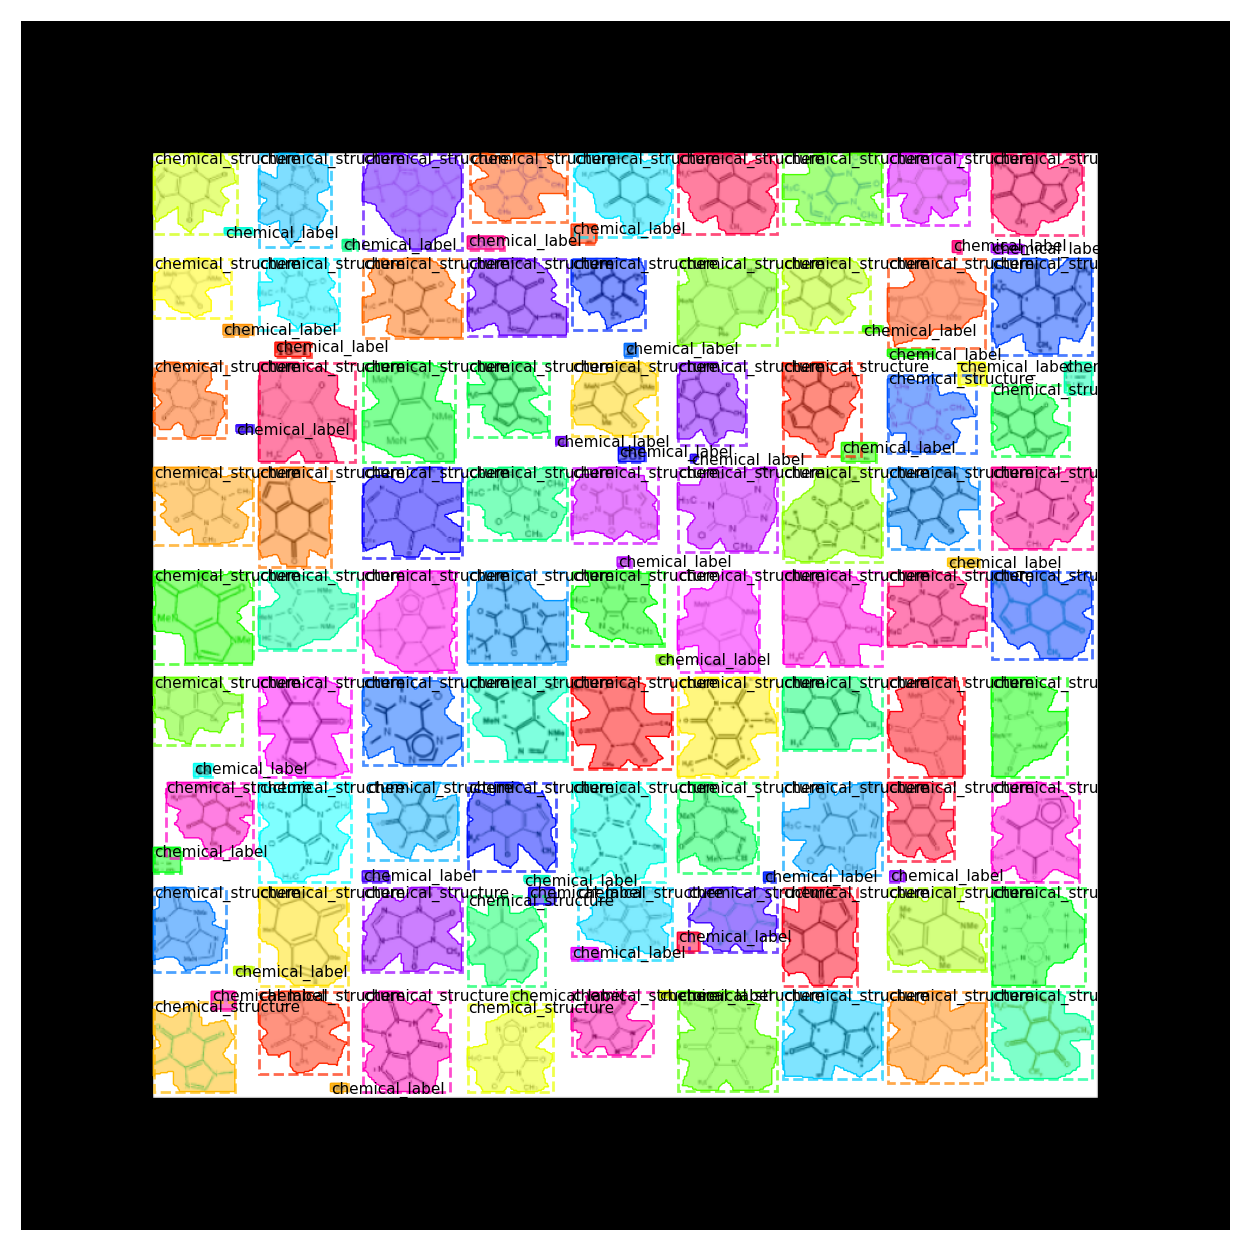

3145728


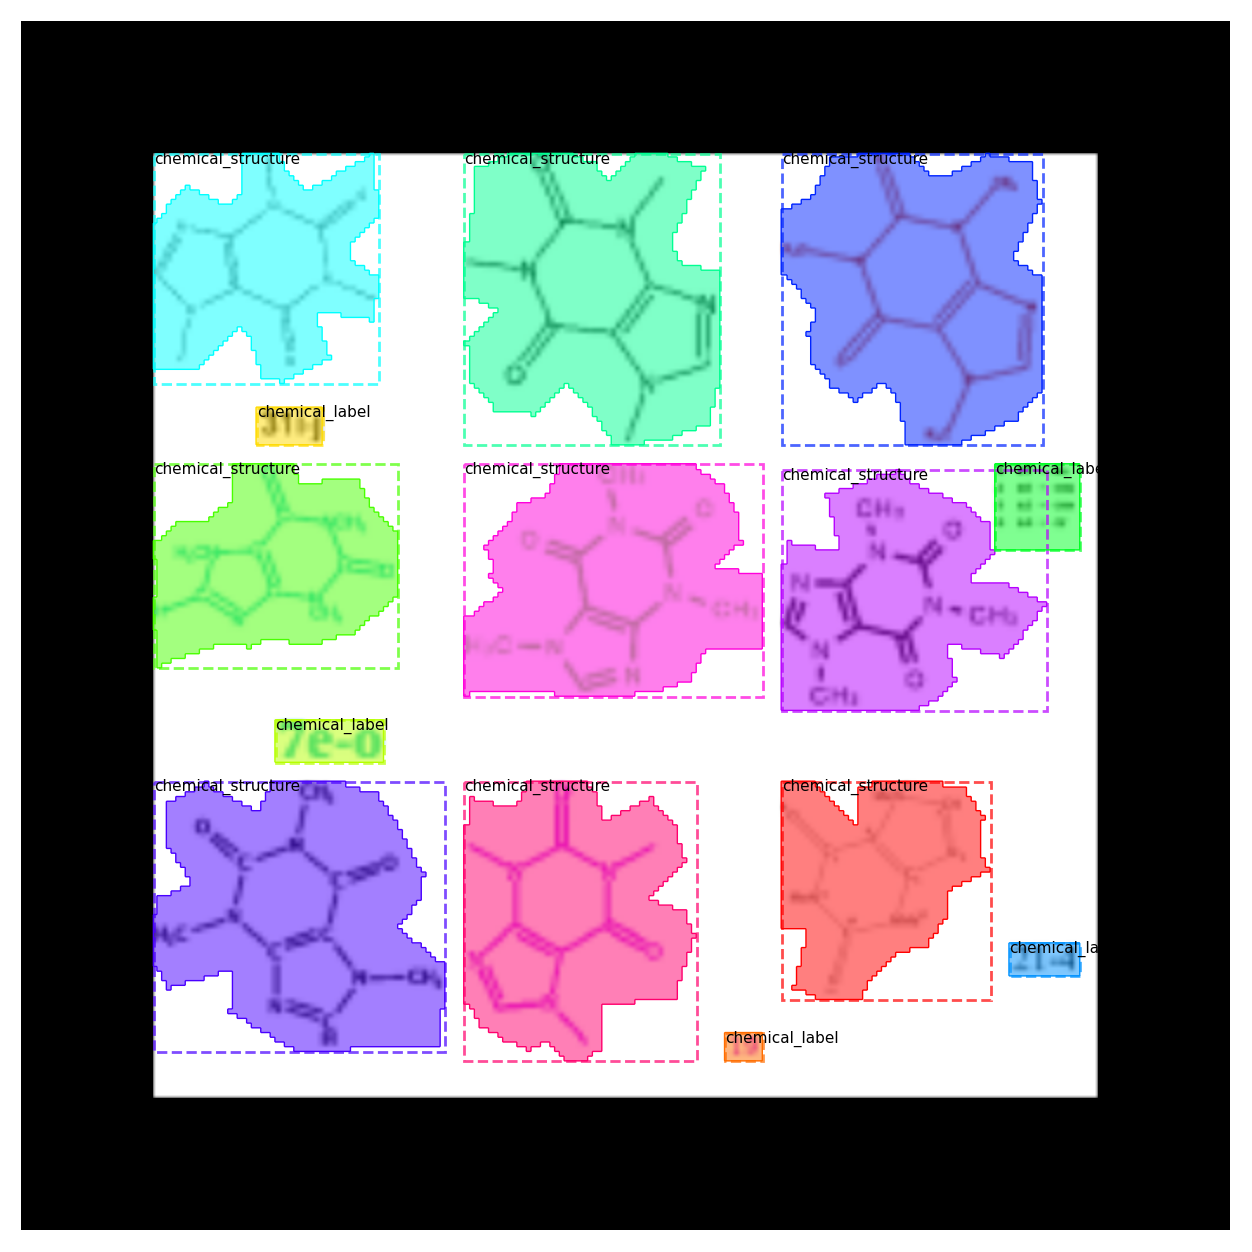

3145728


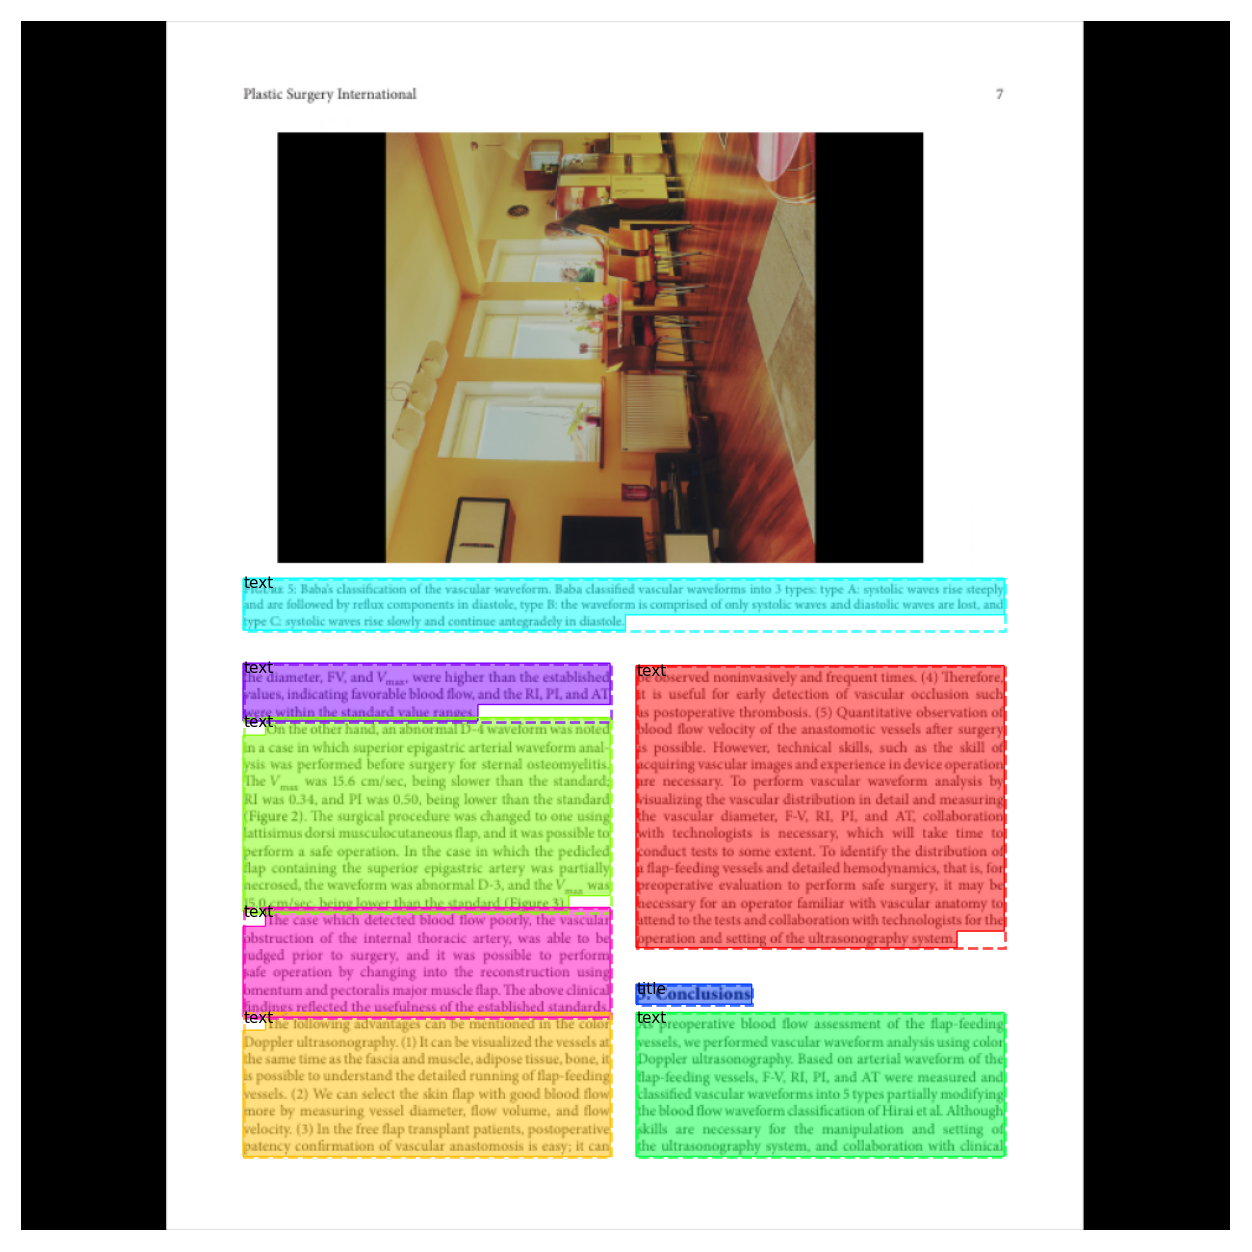

3145728


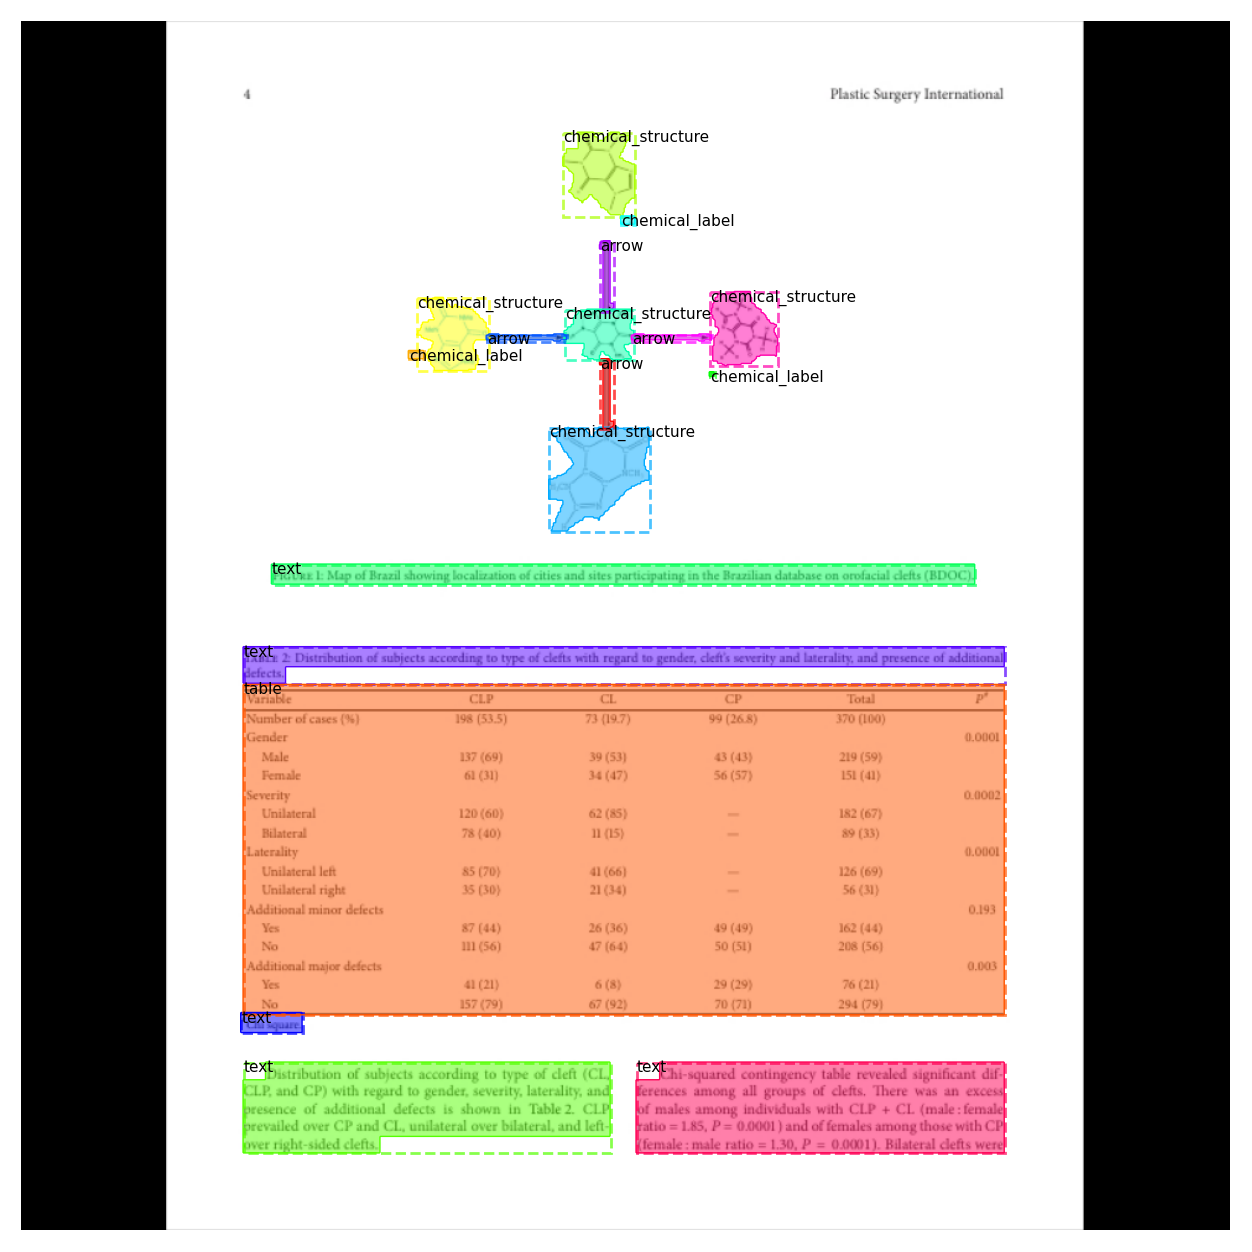

In [8]:
# Load and display random samples
for _ in range(5):
    image, _, class_ids, bbox, mask = modellib.load_image_gt(dataset, config, 1)
    print(image.size)
    visualize.display_instances(image, bbox, mask, class_ids, dataset.categories)


## Image augmentation

You might want to apply image augmentation during training. It is highly recommended to check the effects of the different augmentation methods before applying them.

In [8]:
# Define image augmentation method that you want to apply
# Examples that usually work well:
augmentation = iaa.Sometimes(0.9,
    iaa.SomeOf((1,4), [
    iaa.Affine(scale={"x": (0.5, 1.5), "y": (0.5, 1.5)}),
    iaa.Flipud(1),
    iaa.Fliplr(1),
    iaa.OneOf([iaa.GaussianBlur(sigma=(0.0, 2.0)),
               iaa.imgcorruptlike.JpegCompression(severity=(1,2)),
               iaa.imgcorruptlike.Pixelate(severity=(1,2))]),
    iaa.GammaContrast((2.0, 5.0)),
    iaa.ChangeColorTemperature((1100, 10000))
    ]))

# Example for an augmentation method that usually leads to problems:
#augmentation = iaa.RandAugment(m=30)

in LOAD_IMAGE_GT
image.shape
(1024, 1024, 3)
image_meta
[1.00000000e+00 6.50000000e+02 2.00000000e+02 3.00000000e+00
 1.02400000e+03 1.02400000e+03 3.00000000e+00 0.00000000e+00
 3.54000000e+02 1.02400000e+03 6.69000000e+02 1.57538462e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
Class IDs:
[1 1 1 1 1 3 1 3 1 3 1 3 1 1 1 1 1 3 1 3 1 1 1 1 3 1 3 1 3 1 3 1 3 1 1 1 3
 1 3 1 3]
bboxes
[[   0  354   64  452]
 [ 113  354  209  452]
 [ 227  354  287  452]
 [ 340  354  447  445]
 [ 454  354  537  415]
 [ 537  429  550  452]
 [ 569  354  624  439]
 [ 638  434  648  450]
 [ 689  354  772  447]
 [ 682  407  707  452]
 [ 796  354  879  448]
 [ 890  431  903  448]
 [ 909  354  968  452]
 [   0  458  107  548]
 [ 113  458  213  557]
 [ 227  458  313  557]
 [ 340  475  417  557]
 [ 403  458  417  483]
 [ 468  458  562  494]
 [ 454  499  485  534]
 [ 569  458  655  557]
 [ 682  458  789  556]
 [ 796  458  903  551]
 [ 909

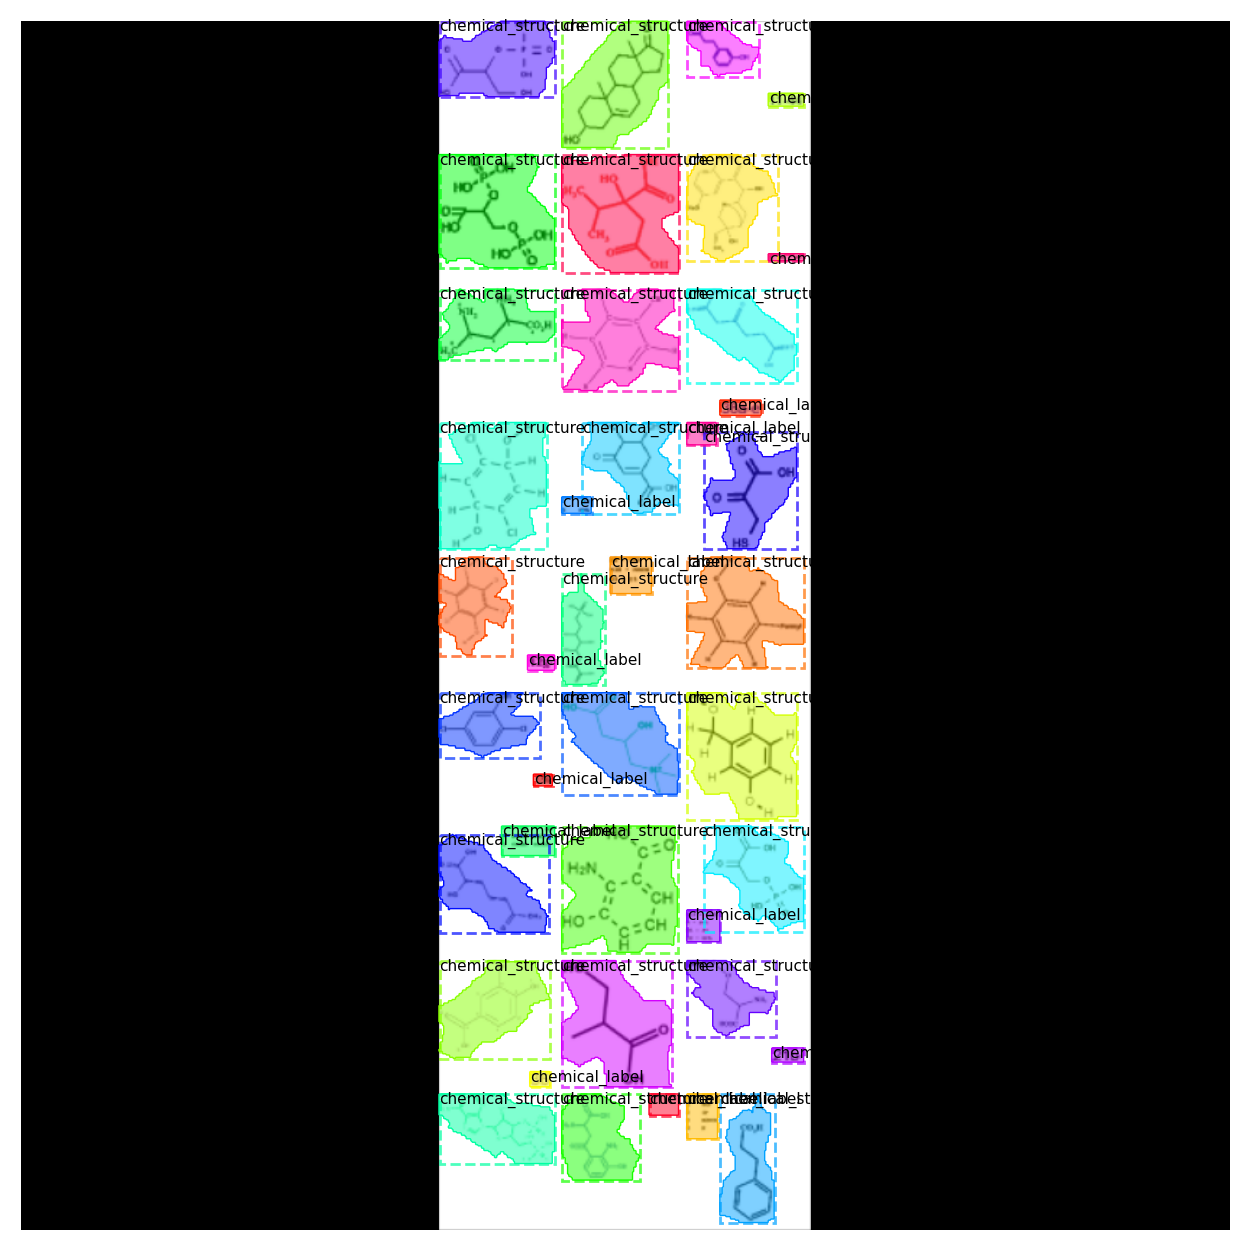

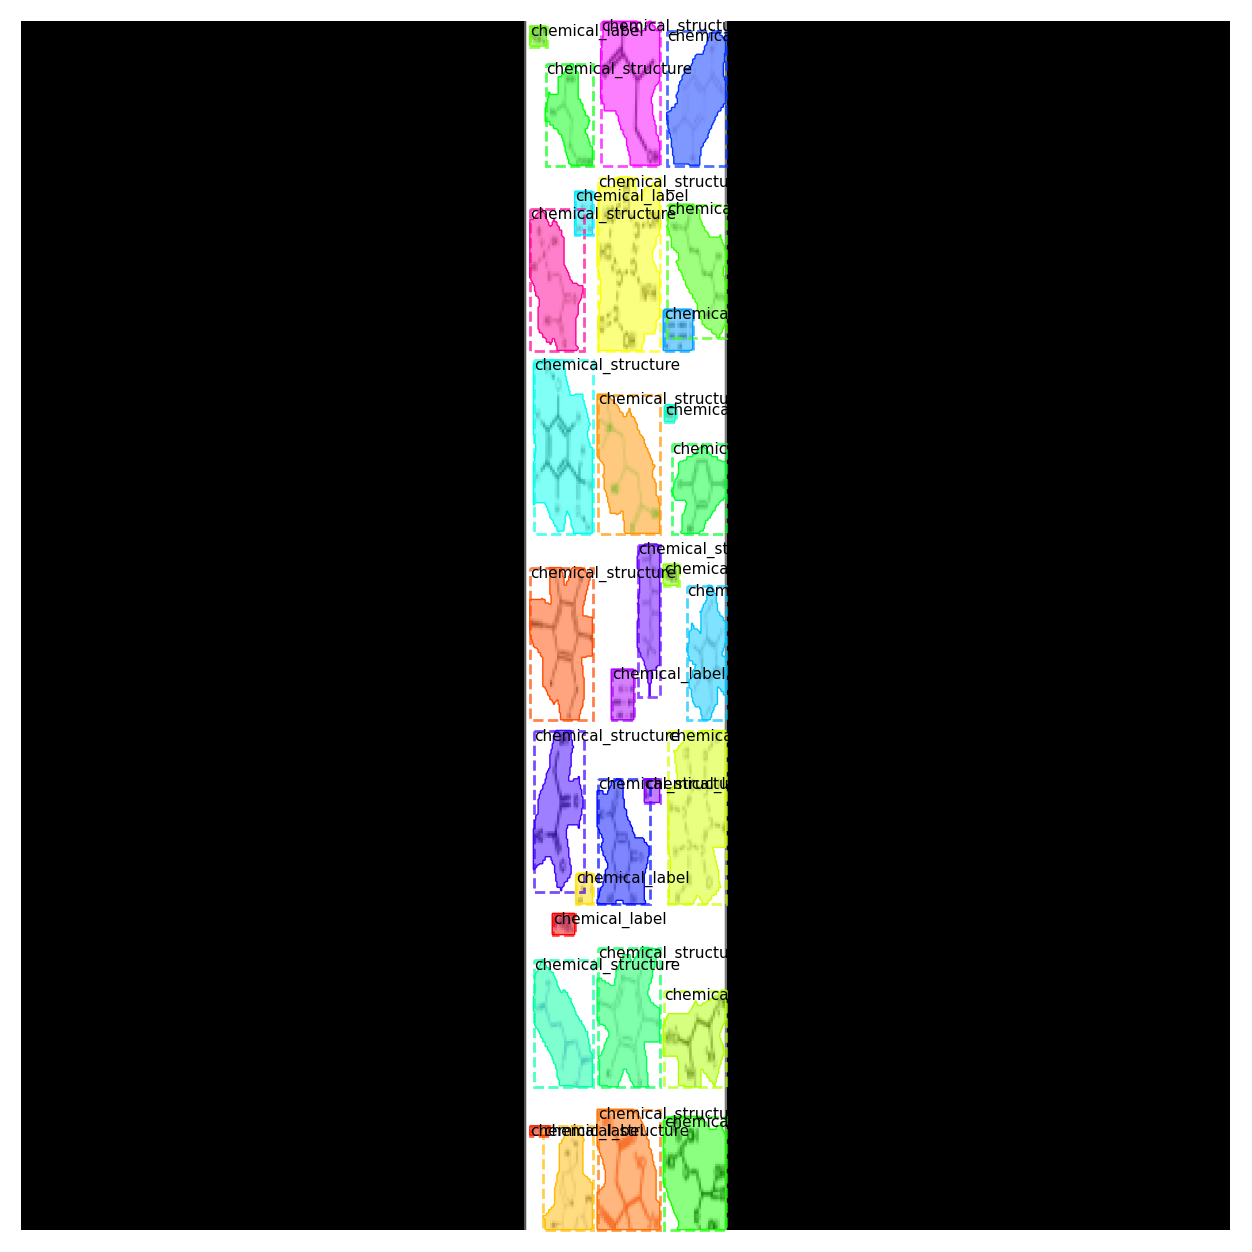

In [10]:
# The code here is mainly copied from load_model_gt() in model.py.

# Load random image and mask.
original_image, _, class_ids, bbox, original_mask = modellib.load_image_gt(dataset, config, 1)

# Store shapes before augmentation to compare
original_image_shape = original_image.shape
original_mask_shape = original_mask.shape

# Compute Bounding box
original_bbox = utils.extract_bboxes(original_mask)

# Apply augmentation
MASK_AUGMENTERS = ["Sequential", "SomeOf", "OneOf", "Sometimes",
                           "Fliplr", "Flipud", "CropAndPad",
                           "Affine", "PiecewiseAffine"]

def hook(images, augmenter, parents, default):
    """Determines which augmenters to apply to masks."""
    return augmenter.__class__.__name__ in MASK_AUGMENTERS

# Make augmenters deterministic to apply similarly to images and masks
det = augmentation.to_deterministic()
augmented_image = det.augment_image(original_image)
# Change mask to np.uint8 because imgaug doesn't support np.bool
augmented_mask = det.augment_image(original_mask.astype(np.uint8),
                         hooks=imgaug.HooksImages(activator=hook))
# Compute Bounding box after augmentation
augmented_bbox = utils.extract_bboxes(augmented_mask)

# Verify that shapes didn't change
assert augmented_image.shape == original_image_shape, "Augmentation shouldn't change image size"
assert augmented_mask.shape == original_mask_shape, "Augmentation shouldn't change mask size"
# Change mask back to bool
#mask = mask.astype(np.bool)


# Display image and instances before and after image augmentation
visualize.display_instances(original_image, original_bbox, original_mask, class_ids, dataset.categories)
visualize.display_instances(augmented_image, augmented_bbox, augmented_mask, class_ids, dataset.categories)